In [10]:
import os
import tempfile

from torch.utils.data import DataLoader

from torchgeo.datasets import Chesapeake, NAIP, ChesapeakeDE, stack_samples
from torchgeo.datasets.utils import download_url
from torchgeo.samplers import RandomGeoSampler
import pandas as pd
import numpy as np

In [11]:
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm


import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable

In [3]:
naip_root = os.path.join(tempfile.gettempdir(), "naip")

In [4]:
naip_root

'/tmp/naip'

In [9]:
ls

superpixel.ipynb


In [8]:
naip_root = os.path.join(tempfile.gettempdir(), "naip")
naip_url = (
    "https://naipeuwest.blob.core.windows.net/naip/v002/de/2018/de_060cm_2018/38075/"
)
tiles = [
    "m_3807511_ne_18_060_20181104.tif",
    "m_3807511_se_18_060_20181104.tif",
    "m_3807512_nw_18_060_20180815.tif",
    "m_3807512_sw_18_060_20180815.tif",
]
for tile in tiles:
    download_url(naip_url + tile, naip_root)

naip = NAIP(naip_root)

100%|██████████| 513332284/513332284 [01:08<00:00, 7511727.96it/s] 


100%|██████████| 521985441/521985441 [01:15<00:00, 6891147.66it/s] 


100%|██████████| 489865657/489865657 [01:00<00:00, 8113889.01it/s] 


100%|██████████| 484476647/484476647 [06:37<00:00, 1219448.14it/s]


In [11]:
chesapeake_root = os.path.join(tempfile.gettempdir(), "chesapeake")
os.makedirs(chesapeake_root, exist_ok=True)
chesapeake = ChesapeakeDE(chesapeake_root, crs=naip.crs, res=naip.res, download=True)

In [15]:
data = naip & chesapeake

In [18]:
data

Felzenszwalb number of segments: 92
SLIC number of segments: 245
Quickshift number of segments: 295
Watershed number of segments: 256


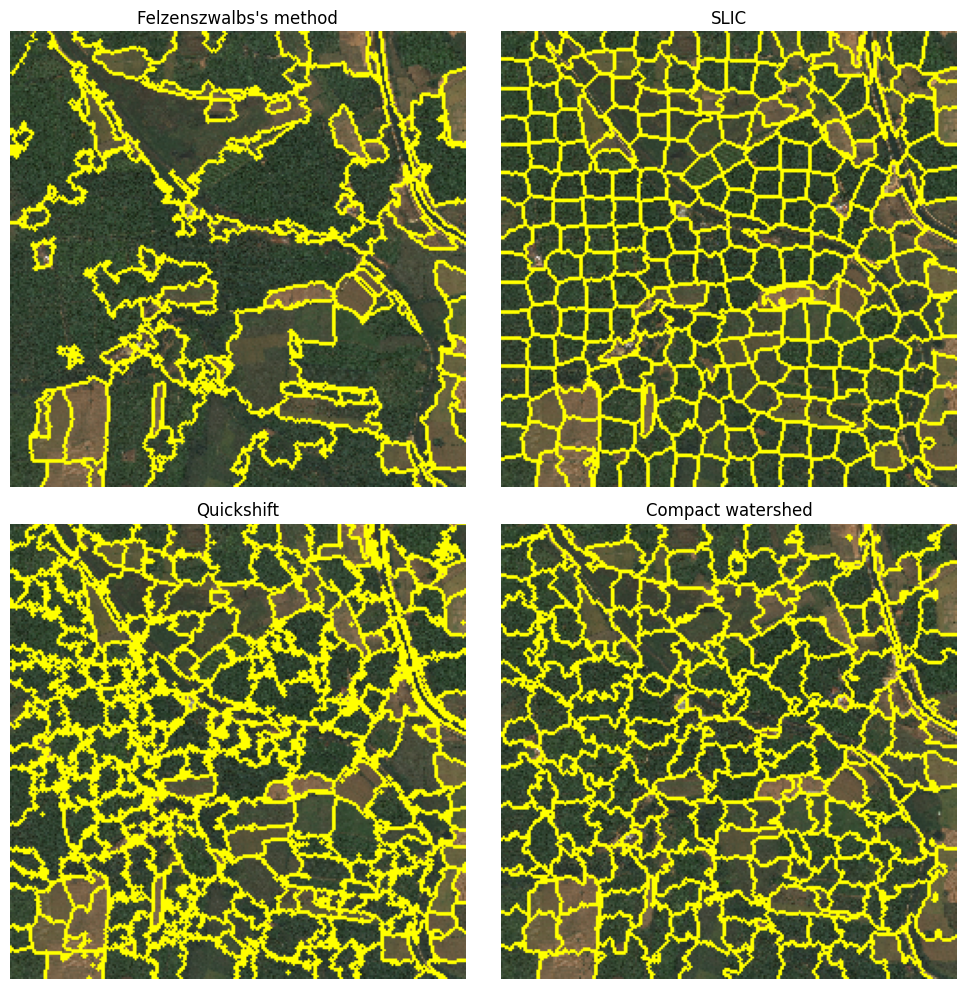

In [44]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

# img = img_as_float(astronaut()[::2, ::2])
img = img_as_float(imgbig[::-10, ::-10])

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1, start_label=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f'Felzenszwalb number of segments: {len(np.unique(segments_fz))}')
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')
print(f'Quickshift number of segments: {len(np.unique(segments_quick))}')
print(f'Watershed number of segments: {len(np.unique(segments_watershed))}')

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [21]:
f = astronaut()[::2, ::2]

In [22]:
f.shape

(256, 256, 3)

In [25]:
segments_fz.shape

(256, 256)

In [26]:
from PIL import Image
img = Image.open('119_sat.jpg')


In [33]:
from skimage import io
imgbig = io.imread('119_sat.jpg')

In [43]:
imgbig[::-10, ::-10].shape

(245, 245, 3)

In [4]:
class_detail = pd.read_csv("landCoverDataset/class_dict.csv")


In [5]:
class_detail.head()

,name,r,g,b
0,urban_land,0,255,255
1,agriculture_land,255,255,0
2,rangeland,255,0,255
3,forest_land,0,255,0
4,water,0,0,255


In [6]:
metadata = pd.read_csv("landCoverDataset/metadata.csv")

In [7]:
metadata.head()

,image_id,split,sat_image_path,mask_path
0,100694,train,train/100694_sat.jpg,train/100694_mask.png
1,102122,train,train/102122_sat.jpg,train/102122_mask.png
2,10233,train,train/10233_sat.jpg,train/10233_mask.png
3,103665,train,train/103665_sat.jpg,train/103665_mask.png
4,103730,train,train/103730_sat.jpg,train/103730_mask.png


In [8]:
metadata.shape

(1146, 4)

In [4]:
TRAIN_DIR = "landCoverDataset/train"
VALID_DIR = "landCoverDataset/valid"
TEST_DIR = "landCoverDataset/test"
COLOR_CODES = "landCoverDataset/class_dict.csv"

{0: [0, 255, 255],
 1: [255, 255, 0],
 2: [255, 0, 255],
 3: [0, 255, 0],
 4: [0, 0, 255],
 5: [255, 255, 255],
 6: [0, 0, 0]}

Premature end of JPEG file


AttributeError: 'Compose' object has no attribute 'items'